In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_rows', 400)

## Data Wrangling

In [3]:
#Import data
shooting_data = pd.read_csv("shooting_data.csv")
totals_data = pd.read_csv("totals_data.csv")

In [4]:
shooting_data

,Player,Pos,Age,Tm,G,MP,FG%,Dist.,%_of FGA_2P,%_of FGA_0-3,...,FG%_16-3P,FG%_3P,%_Ast’d_2P,%_Ast’d_3P,%FGA_Dunks,#_Dunks,%3PA_Corner,3P%_Corner,Heaves_Att.,#_Heaves
0,Precious Achiuwa\achiupr01,PF,21,MIA,61,737,0.544,3.3,0.996,0.667,...,0.167,0.000,0.734,NaN,0.259,48,0.000,NaN,0,0
1,Jaylen Adams\adamsja01,PG,24,MIL,7,18,0.125,11.0,0.750,0.250,...,NaN,0.000,0.000,NaN,0.000,0,0.000,NaN,0,0
2,Steven Adams\adamsst01,C,27,NOP,58,1605,0.614,3.9,0.990,0.646,...,NaN,0.000,0.598,NaN,0.182,51,0.000,NaN,3,0
3,Bam Adebayo\adebaba01,C,23,MIA,64,2143,0.570,7.6,0.990,0.353,...,0.386,0.250,0.656,1.000,0.188,137,0.125,0.000,0,0
4,LaMarcus Aldridge\aldrila01,C,35,TOT,26,674,0.473,15.5,0.730,0.152,...,0.489,0.388,0.688,0.968,0.044,12,0.175,0.429,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,Delon Wright\wrighde01,PG,28,SAC,27,696,0.462,12.7,0.631,0.253,...,0.333,0.398,0.282,0.727,0.009,2,0.193,0.375,0,0
701,Thaddeus Young\youngth01,PF,32,CHI,68,1652,0.559,5.7,0.932,0.446,...,0.333,0.267,0.570,1.000,0.038,22,0.489,0.318,3,0
702,Trae Young\youngtr01,PG,22,ATL,63,2125,0.438,15.3,0.643,0.162,...,0.530,0.343,0.125,0.287,0.000,0,0.038,0.400,0,0
703,Cody Zeller\zelleco01,C,28,CHO,48,1005,0.559,4.9,0.914,0.605,...,0.500,0.143,0.751,1.000,0.173,52,0.179,0.000,0,0


Some players were traded during the season, so I removed all rows with duplicate players leaving only their total season stats

In [5]:
#Remove Duplicates
duplicates = shooting_data["Player"].duplicated()
shooting_data = shooting_data[duplicates == False]

duplicates = totals_data["Player"].duplicated()
totals_data = totals_data[duplicates == False]

In [6]:
#Merge Datasets
shooting_data.set_index(["Player"], inplace=True)
data = shooting_data.merge(totals_data, how='inner', on='Player')

In [8]:
def split_func(s):
    return s.encode('unicode_escape').decode().split('\\')[0]

data["Player"] = data["Player"].apply(split_func)

Note: Csv files from basketball reference include the player name and their sitewide id. So the above code gets rid of the id so we can just see the name.

In [9]:
#Remove all players with fewer than 100 attempted FGs
data = data[data["FGA"] >= 100]

#Get number of attempts from every range
data["0-3_attempts"] = data["%_of FGA_0-3"] * data["FGA"]
data["3-10_attempts"] = data["%_of FGA_3-10"] * data["FGA"]
data["10-16_attempts"] = data["%_of FGA_10-16"] * data["FGA"]
data["16-3P_attempts"] = data["%_of FGA_16-3P"] * data["FGA"]
data["midrange_attempts"] = data["10-16_attempts"] + data["16-3P_attempts"]
data["corner_3_attempts"] = data["%3PA_Corner"] * data["3PA"]

#Get number of made shots from each range
data["0-3_made"] = data["0-3_attempts"] *  data["FG%_0-3"]
data["3-10_made"] = data["3-10_attempts"] *  data["FG%_3-10"]
data["10-16_made"] = data["10-16_attempts"] *  data["FG%_10-16"]
data["16-3P_made"] = data["16-3P_attempts"] *  data["FG%_16-3P"]
data["midrange_made"] = data["10-16_made"] + data["16-3P_made"]
data["corner_3_made"] = data["corner_3_attempts"] * data["3P%_Corner"]

In [10]:
#Get Effective Field Goal Percentages and Points per shot by distance
data["EFG%_3P"] = data["3P%"] * 1.5

data["PPS_0-3"] = data["FG%_0-3"] * 2
data["PPS_3-10"] = data["FG%_3-10"] * 2
data["PPS_10-16"] = data["FG%_10-16"] * 2
data["PPS_16-3P"] = data["FG%_16-3P"] * 2
data["PPS_midrange"] = data["midrange_made"] * 2 / data["midrange_attempts"]
data["PPS_3P"] = data["3P%"] * 3

In [76]:
data[["Player", "Tm_x", "PPS_0-3", "PPS_3-10", "PPS_10-16", "PPS_16-3P", "PPS_midrange", "PPS_3P"]]

,Player,Tm_x,PPS_0-3,PPS_3-10,PPS_10-16,PPS_16-3P,PPS_midrange,PPS_3P
0,Precious Achiuwa,MIA,1.290,0.734,0.666,0.334,0.533200,0.000
2,Steven Adams,NOP,1.386,0.988,0.858,NaN,NaN,0.000
3,Bam Adebayo,MIA,1.588,0.942,0.912,0.772,0.866030,0.750
4,LaMarcus Aldridge,TOT,1.244,0.944,0.888,0.978,0.948000,1.164
6,Nickeil Alexander-Walker,NOP,0.962,1.040,0.842,0.918,0.892459,1.041
7,Grayson Allen,MEM,1.334,0.730,0.828,0.250,0.704607,1.173
8,Jarrett Allen,TOT,1.522,0.872,0.814,0.428,0.682306,0.948
10,Kyle Anderson,MEM,1.308,0.994,1.082,0.840,1.000258,1.080
11,Giannis Antetokounmpo,MIL,1.674,0.802,0.718,0.648,0.690179,0.909
13,Thanasis Antetokounmpo,MIL,1.342,0.210,0.000,1.000,0.500000,0.723


In [12]:
data.to_csv("merged_data.csv")

## Analysis

### Comparing aggregate efficiency by distance

In [59]:
index = ["At Rim", "3-10 ft", "10-16 ft", "16ft-3P", "All midrange (10-3P)", "3P"]

#Get League FG%
FGP = pd.Series([data["0-3_made"].sum()/data["0-3_attempts"].sum(),
data["3-10_made"].sum()/data["3-10_attempts"].sum(),
data["10-16_made"].sum()/data["10-16_attempts"].sum(),
data["16-3P_made"].sum()/data["16-3P_attempts"].sum(),
(data["10-16_made"].sum() + data["16-3P_made"].sum()) /
                  (data["10-16_attempts"].sum() + data["16-3P_attempts"].sum()),
data["3P"].sum() / data["3PA"].sum()], name='EFG%', index=index)

#Get League EFG%
EFGP = pd.Series([data["0-3_made"].sum()/data["0-3_attempts"].sum(),
data["3-10_made"].sum()/data["3-10_attempts"].sum(),
data["10-16_made"].sum()/data["10-16_attempts"].sum(),
data["16-3P_made"].sum()/data["16-3P_attempts"].sum(),
(data["10-16_made"].sum() + data["16-3P_made"].sum()) /
                  (data["10-16_attempts"].sum() + data["16-3P_attempts"].sum()),
data["3P"].sum() / data["3PA"].sum() * 1.5], name='EFG%', index=index)

#Get League Points per Shot
PPS = pd.Series(EFGP * 2, name='PPS', index=index)

In [60]:
frame = {"FG%": FGP, "EFG%": EFGP, "PPS": PPS}
frame = pd.DataFrame(frame).round(2)

#Export to csv file
frame.to_csv("Efficiency_by_distance.csv")

frame

### Which players are exceptions to the rule?

In [19]:
#Only include players with at least 20 midrange and 3-point attempts each
data_comp_3P_midrange = data[(data["midrange_attempts"] >= 20) & (data["3PA"]>= 20)]

In [55]:
#number of players who are more efficient from midrange than from 3-point range
sum(data_comp_3P_midrange["PPS_3P"] < data_comp_3P_midrange["PPS_midrange"])

21

In [21]:
#total number of players in the sample
len(data_comp_3P_midrange)

274

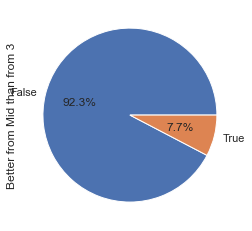

In [64]:
better_from_midrange = pd.Series(data_comp_3P_midrange["PPS_3P"] < data_comp_3P_midrange["PPS_midrange"],
                        name="Better from Mid than from 3")
better_from_midrange.groupby(better_from_midrange).count().plot.pie(autopct="%.1f%%");

Only about 7.7% of NBA players were more efficient on midrange shots than they were on 3-pointers during the 2021 regular season. Below is a list of all of those players.

In [54]:
data_comp_3P_midrange[better_from_midrange][["Player", "PPS_midrange", "PPS_3P"]]

,Player,PPS_midrange,PPS_3P
21,Deandre Ayton,0.880857,0.600
34,Aron Baynes,0.828695,0.786
45,Khem Birch,0.882715,0.750
83,Jimmy Butler,0.810727,0.735
123,DeMar DeRozan,0.935800,0.771
235,De'Andre Hunter,1.047015,0.978
237,Serge Ibaka,1.079908,1.017
315,Caleb Martin,0.822481,0.744
324,Tyrese Maxey,0.954602,0.903
328,T.J. McConnell,1.096831,0.939


In [101]:
data_comp_3P_midrange.to_csv("merged_data.csv")